In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

**Data Loading and Preprocessing**

The sensor data is loaded from a CSV file and preprocessed to handle missing values. In this example, missing values are filled with the median of each column.

In [5]:
sensor_data = pd.read_csv("/kaggle/input/pump-sensor-data/sensor.csv")
sensor_data["timestamp"] = pd.to_datetime(sensor_data["timestamp"])

sensor_data_columns = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 
                       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07']

sensor_val = sensor_data[sensor_data_columns]

sensor_val = sensor_val.fillna(sensor_val.median())
                           

**Model Training**

An Isolation Forest model is initialized and trained using the preprocessed sensor data. Isolation Forest is an effective algorithm for anomaly detection, especially in high-dimensional datasets like sensor data.

In [6]:
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(sensor_val)


anomaly_scores = model.decision_function(sensor_val)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [7]:
sensor_data['anomaly_scores'] = anomaly_scores
sensor_data['anomaly'] = model.predict(sensor_val)



**Visualization**

The detected anomalies are visualized alongside the sensor data and anomaly scores. This visualization provides insights into the anomalies detected by the Isolation Forest algorithm.

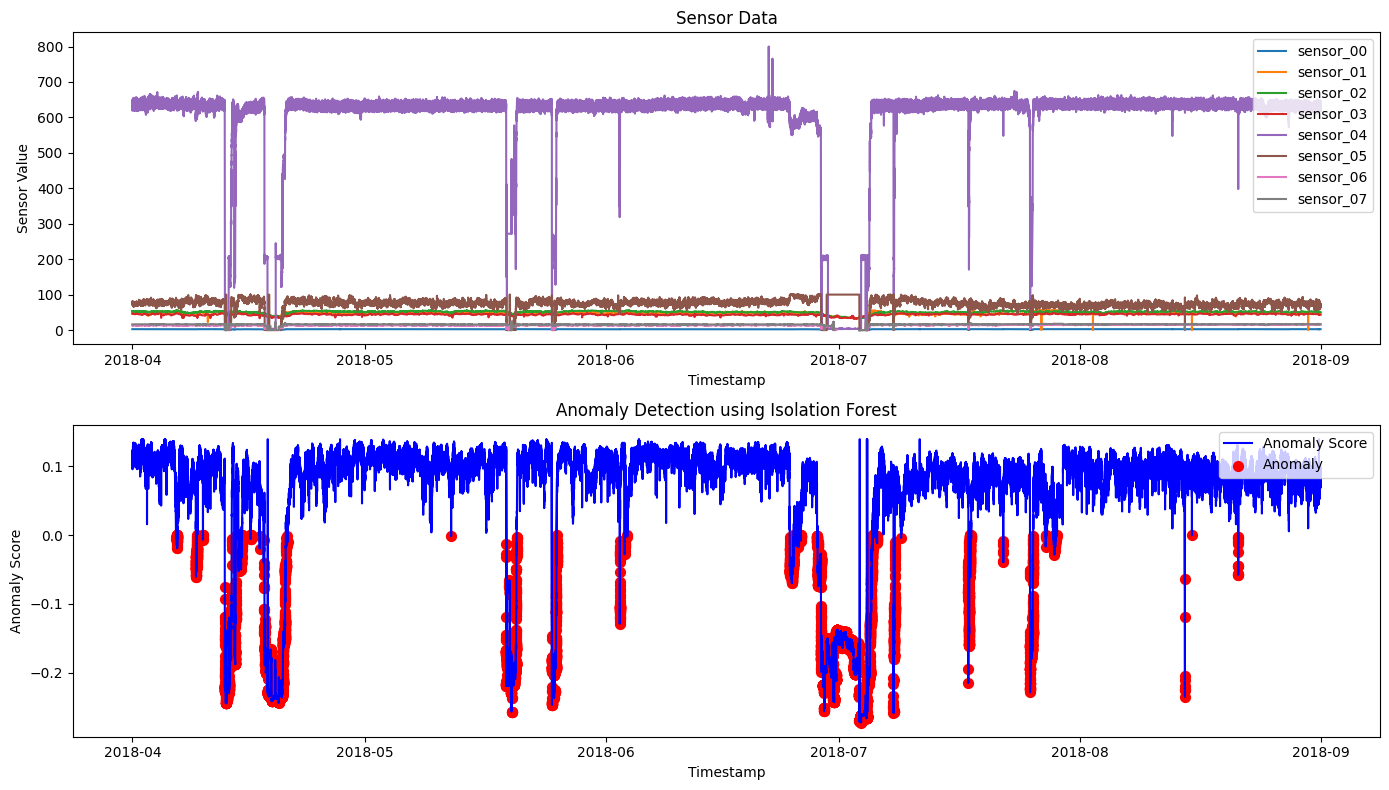

In [8]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
for col in sensor_data_columns:
    plt.plot(sensor_data['timestamp'], sensor_data[col], label=col)
plt.title('Sensor Data')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Value')
plt.legend(loc='upper right')


plt.subplot(2, 1, 2)
plt.plot(sensor_data['timestamp'], sensor_data['anomaly_scores'], label='Anomaly Score',
         color='blue')
plt.scatter(sensor_data[sensor_data['anomaly'] == -1]['timestamp'], 
            sensor_data[sensor_data['anomaly'] == -1]['anomaly_scores'], 
            label='Anomaly', color='red', s=50)
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()